In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
import math
import re
%matplotlib inline
import chart_studio.plotly as py
import plotly.offline as py
from plotly.offline import iplot
from plotly import tools
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import squarify

In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1193862,621542692,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...
1,1193862,623029446,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...
2,1193875,621536604,2020-04-01,338157108,Tara,Great host and location!
3,1225831,621605392,2020-04-02,78318060,Mary,Paul and Larry went above and beyond to make u...
4,1307195,622121374,2020-04-10,342837713,认证手机用户0077,nice host


In [3]:
listings = pd.read_csv('listings.csv')
listings = listings.rename(columns={"id": "listing_id"})
listings

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_text,number_of_reviews_l30d
0,1193862,https://www.airbnb.com/rooms/1193862,20200428151650,2020-04-28,Middle Room in Shared Apt,If you are bringing a car you must let us know...,** Please note there has been some confusion l...,If you are bringing a car you must let us know...,none,NaN,...,flexible,f,f,3,0,3,0,1.49,NaN,NaN
1,1193875,https://www.airbnb.com/rooms/1193875,20200428151650,2020-04-28,Large Downstairs Room,If you are bringing a car you must let us know...,** Please note there has been some confusion l...,If you are bringing a car you must let us know...,none,NaN,...,strict_14_with_grace_period,f,f,3,0,3,0,1.98,NaN,NaN
2,1225831,https://www.airbnb.com/rooms/1225831,20200428151650,2020-04-28,Victorian Charm MIT/Harvard/Kendall/Central-1BR,"Welcome to our 100-year-old house! Cozy, frien...","First off, in these days of divisiveness, we s...","Welcome to our 100-year-old house! Cozy, frien...",none,"Despite our urban setting, our neighborhood is...",...,moderate,f,f,1,1,0,0,5.12,NaN,NaN
3,1307195,https://www.airbnb.com/rooms/1307195,20200428151650,2020-04-28,Harvard and MIT - Enjoy Comfort and Convenience!,Stay in the heart of Cambridge in our beautifu...,This sun filled flat is the ideal Cambridge lo...,Stay in the heart of Cambridge in our beautifu...,none,Our neighborhood is one of the most exciting i...,...,moderate,f,f,1,1,0,0,6.11,NaN,NaN
4,1984737,https://www.airbnb.com/rooms/1984737,20200428151650,2020-04-29,Charming Harvard Victorian,Charming Victorian a 10 minute walk or 5 min t...,This beautiful 125+ year old home offers appro...,Charming Victorian a 10 minute walk or 5 min t...,none,Nestled up to Harvard and surrounds the neighb...,...,flexible,t,t,2,2,0,0,4.07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,47538101,https://www.airbnb.com/rooms/47538101,20210325145911,2021-03-26,SoloPrivate Space,NaN,NaN,This Apt in the heart of Cambridge. Only 8 min...,NaN,"MIT,Harvard,downtown boston,Fenway park,airpor...",...,NaN,NaN,NaN,2,2,0,0,2.05,1 bath,2.0
2121,47703691,https://www.airbnb.com/rooms/47703691,20210325145911,2021-03-25,ENTIRE APT: Bright Sun Drenched Spot in Cambri...,NaN,NaN,Located right in the heart of Inman Square in ...,NaN,Centrally located near all the best restaurant...,...,NaN,NaN,NaN,1,1,0,0,3.00,1 bath,3.0
2122,48107460,https://www.airbnb.com/rooms/48107460,20210325145911,2021-03-26,I2 Private Room by Kendall Sq,NaN,NaN,"Our house is close to Harvard, MIT Kendall Squ...",NaN,NaN,...,NaN,NaN,NaN,3,0,3,0,2.00,1 shared bath,2.0
2123,48108594,https://www.airbnb.com/rooms/48108594,20210325145911,2021-03-26,Private room next to MIT/Harvard 3,NaN,NaN,"Our house is close to Harvard, MIT Kendall Squ...",NaN,NaN,...,NaN,NaN,NaN,3,0,3,0,0.77,1.5 shared baths,0.0


In [4]:
merged = pd.merge(left=listings[['listing_id',
                                      'host_id', 
                                      'host_name', 
                                      'number_of_reviews', 
                                      'last_review', 
                                      'reviews_per_month']], 
                       right=reviews[['listing_id',
                                      'date',
                                      'reviewer_id',
                                      'reviewer_name',
                                      'comments']], 
                       left_on='listing_id', right_on='listing_id')
merged

,listing_id,host_id,host_name,number_of_reviews,last_review,reviews_per_month,date,reviewer_id,reviewer_name,comments
0,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...
1,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...
2,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...
3,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...
4,1193862,229956,Adam,125,2020-04-24,1.47,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...
...,...,...,...,...,...,...,...,...,...,...
103439,47703691,886226,Kibbee,3,2021-03-23,3.00,2021-03-23,147960000,Jessica,"Bright, clean apartment in great Cambridge loc..."
103440,48107460,218493228,John,2,2021-03-09,2.00,2021-02-28,384320002,Chris,Great host
103441,48107460,218493228,John,2,2021-03-09,2.00,2021-03-09,302602887,Michael,There's plenty of amenities to make your stay ...
103442,48157277,374663992,Amanda,2,2021-03-21,2.00,2021-03-11,6146936,Jeannette,"This was a relaxing, quiet studio, beautifully..."


In [5]:
merged['last_review'] = pd.to_datetime(merged['last_review'])
merged['date'] = pd.to_datetime(merged['date'])

In [6]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103444 entries, 0 to 103443
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   listing_id         103444 non-null  int64         
 1   host_id            103444 non-null  int64         
 2   host_name          103444 non-null  object        
 3   number_of_reviews  103444 non-null  int64         
 4   last_review        103444 non-null  datetime64[ns]
 5   reviews_per_month  103444 non-null  float64       
 6   date               103444 non-null  datetime64[ns]
 7   reviewer_id        103444 non-null  int64         
 8   reviewer_name      103444 non-null  object        
 9   comments           103444 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 8.7+ MB


In [7]:
merged.duplicated(keep=False)

0          True
1          True
2          True
3          True
4          True
          ...  
103439    False
103440    False
103441    False
103442    False
103443    False
Length: 103444, dtype: bool

In [8]:
merged.drop_duplicates(subset=['comments'])

,listing_id,host_id,host_name,number_of_reviews,last_review,reviews_per_month,date,reviewer_id,reviewer_name,comments
0,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...
1,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...
8,1193875,229956,Adam,164,2020-04-01,1.98,2020-04-01,338157108,Tara,Great host and location!
10,1193875,229956,Adam,164,2020-04-01,1.98,2020-05-22,197291847,Travis,The Host was very friendly and extremely helpf...
13,1193875,229956,Adam,164,2020-04-01,1.98,2020-05-25,210079094,Ajith,What a great vibe to the place. It inundates y...
...,...,...,...,...,...,...,...,...,...,...
103438,47703691,886226,Kibbee,3,2021-03-23,3.00,2021-03-13,143082741,Karina,This place has the perfect location to walk ar...
103439,47703691,886226,Kibbee,3,2021-03-23,3.00,2021-03-23,147960000,Jessica,"Bright, clean apartment in great Cambridge loc..."
103441,48107460,218493228,John,2,2021-03-09,2.00,2021-03-09,302602887,Michael,There's plenty of amenities to make your stay ...
103442,48157277,374663992,Amanda,2,2021-03-21,2.00,2021-03-11,6146936,Jeannette,"This was a relaxing, quiet studio, beautifully..."


In [9]:
# length of message excluding space
length = merged.copy()
length['comment_length'] = length['comments'].apply(lambda x: len(str(x)) - (str(x).count(" ")))
length

,listing_id,host_id,host_name,number_of_reviews,last_review,reviews_per_month,date,reviewer_id,reviewer_name,comments,comment_length
0,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,214
1,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...,169
2,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,214
3,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...,169
4,1193862,229956,Adam,125,2020-04-24,1.47,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,214
...,...,...,...,...,...,...,...,...,...,...,...
103439,47703691,886226,Kibbee,3,2021-03-23,3.00,2021-03-23,147960000,Jessica,"Bright, clean apartment in great Cambridge loc...",87
103440,48107460,218493228,John,2,2021-03-09,2.00,2021-02-28,384320002,Chris,Great host,9
103441,48107460,218493228,John,2,2021-03-09,2.00,2021-03-09,302602887,Michael,There's plenty of amenities to make your stay ...,65
103442,48157277,374663992,Amanda,2,2021-03-21,2.00,2021-03-11,6146936,Jeannette,"This was a relaxing, quiet studio, beautifully...",163


In [10]:
# % of punctuation excluding space
import string
punct = merged.copy()
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100 if count !=0 else 0
punct['punctuation_%_incomment'] = punct['comments'].apply(lambda x: count_punct(str(x)))
punct.head()

,listing_id,host_id,host_name,number_of_reviews,last_review,reviews_per_month,date,reviewer_id,reviewer_name,comments,punctuation_%_incomment
0,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,3.3
1,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...,2.4
2,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,3.3
3,1193862,229956,Adam,125,2020-04-24,1.49,2020-04-24,80613198,Amna,Adam is unique also his place same.\nHis respo...,2.4
4,1193862,229956,Adam,125,2020-04-24,1.47,2020-04-01,311828181,Abdul-Malik,Great place located just walking distance to w...,3.3


In [11]:
#Check max length of sentence before cleaning
comment_length = []
for i in merged.comments:
    comment_length.append(len(i.split(' ')))
comment_max_length = max(comment_length)
print("Maximum length of comment:", comment_max_length)

Maximum length of comment: 842


In [12]:
#Convert words to lower case
merged.comments = merged.comments.apply(lambda x: x.lower())
#Remove quotation marks
merged.comments = merged.comments.apply(lambda x: re.sub("'", "", x))
#Remove digits
remove_digits = str.maketrans("","", string.digits)
merged.comments = merged.comments.apply(lambda x: x.translate(remove_digits))
#Remove numbers
merged.comments = merged.comments.str.replace('\d+','')
#Remove punctuation
remove = re.sub(r'\W', ' ', str(""))
def remove_punct(text):
    remove = re.sub(r'\W',' ', str(text))
    return remove
merged.comments = merged.comments.apply(lambda x: remove_punct(x))
#Remove spaces which we got after removing punctuation
merged.comments = merged.comments.apply(lambda x: x.strip())
merged.comments = merged.comments.apply(lambda x: re.sub(" +", " ", x))
merged['comments'].values[1]

<ipython-input-12-48dc4a365672>:9: FutureWarning:

The default value of regex will change from True to False in a future version.



'adam is unique also his place same his response was very quick and he helps even to check in early when needed great hospitality with great value highly recommended and i ll definitely come again'

         Words  Frequency
0     location      33910
1        would      18727
2         nice      17157
3         host      15577
4    recommend      14949
5  comfortable      14345
6        space      14190
7         room      13591
8    cambridge      13496
9         good      13255


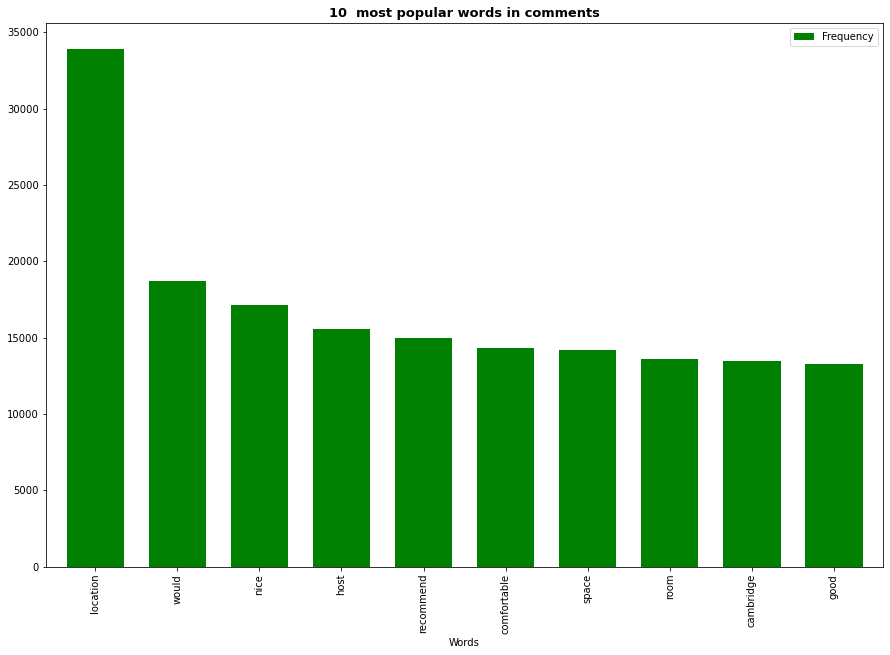

In [13]:
#Plot 10 most popular words in English dataframe after cleaning
import nltk
from collections import Counter
number_top_words = 10
eng_stopwords = nltk.corpus.stopwords.words('english')
eng_stopwords.extend(['place','stay','great','clean','apartment']) #Removing stop words, such as 'and', 'or', etc.
# RegEx for stopwords
re_eng_stopwords = r'\b(?:{})\b'.format('|'.join(eng_stopwords))
# replace '|'-->' ' and drop all stopwords
eng_words = (merged.comments
             .str.lower()
             .replace([r'\|', re_eng_stopwords], [' ', ''], regex=True)
             .str.cat(sep=' ')
             .split()
)
df = pd.DataFrame(Counter(eng_words).most_common(number_top_words), columns=['Words', 'Frequency'])
print(df)
df.set_index('Words').plot(kind='bar', figsize = (15, 10), width = 0.7, color ='green')
plt.title('10  most popular words in comments', fontsize=13, fontweight='bold')
plt.show()

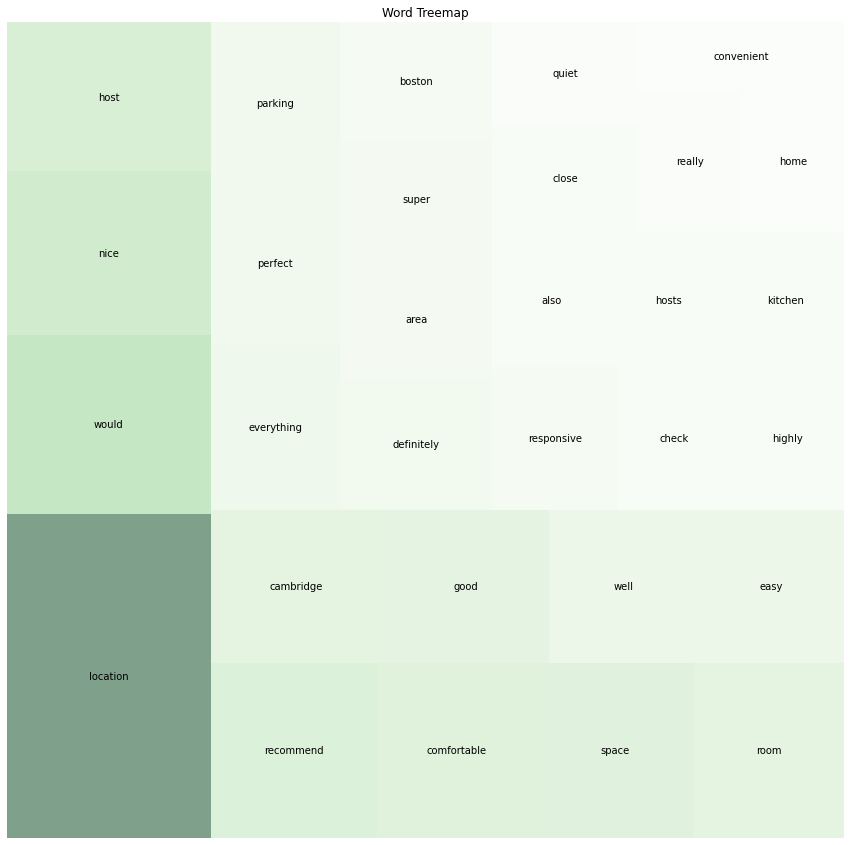

In [14]:
word_counts = Counter(eng_words)
common_n = [n for (w, n) in word_counts.most_common(30)]
common_w = [w for (w, n) in word_counts.most_common(30)]
norm = matplotlib.colors.Normalize(vmin = min(common_n), vmax = max(common_n))

colors = [matplotlib.cm.Greens(norm(value)) for value in common_n] 
    
    # draw a treemap
plt.figure(figsize=(15, 15))
squarify.plot(label = common_w, sizes = common_n, color = colors, alpha = 0.5)
plt.title("Word Treemap")
plt.axis("off")
plt.show()